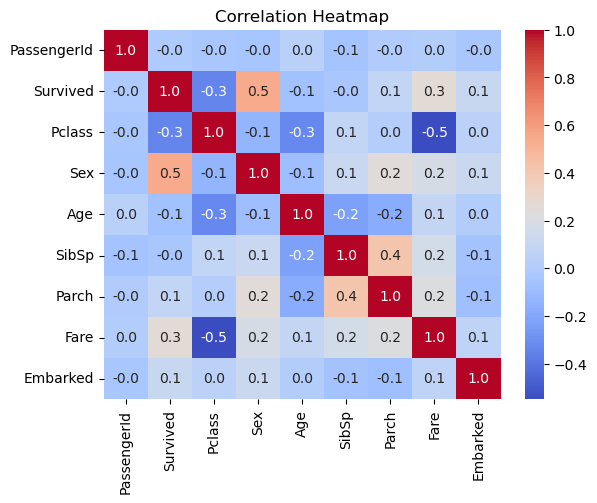

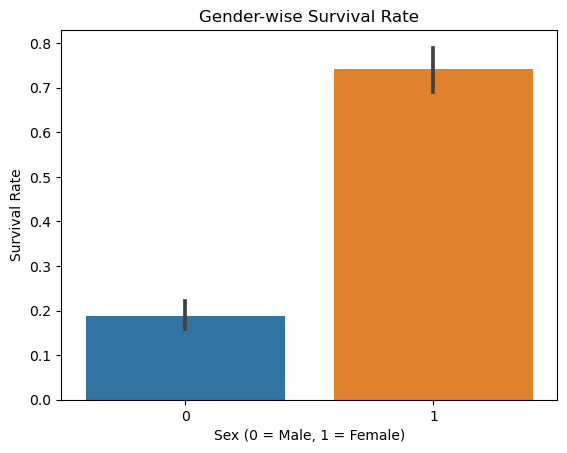

C:\Users\soham\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: LogisticRegression
Accuracy: 0.8059701492537313
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.87      0.84       157
           1       0.79      0.72      0.75       111

    accuracy                           0.81       268
   macro avg       0.80      0.79      0.80       268
weighted avg       0.81      0.81      0.80       268

MSE: 0.19402985074626866
R2: 0.20032134044872896
--------------------------------------------------
Model: RandomForestClassifier
Accuracy: 0.8171641791044776
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.92      0.86       157
           1       0.86      0.67      0.75       111

    accuracy                           0.82       268
   macro avg       0.83      0.80      0.80       268
weighted avg       0.82      0.82      0.81       268

MSE: 0.1828358208955224
R2: 0.2464566477305331
-------------------------------------

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, classification_report
from sklearn.model_selection import train_test_split

# Load Data
data = pd.read_csv("C:/Users/soham/OneDrive/Documents/Immersivify/Task 3/titanic/train.csv")

# Data Preprocessing
def preprocess_data(data):
    """Preprocess the Titanic dataset."""
    data["Age"] = data["Age"].fillna(data["Age"].mean())
    data["Embarked"] = data["Embarked"].fillna("S")
    data["Sex"] = data["Sex"].replace(['male', 'female'], [0, 1])
    data["Embarked"] = data["Embarked"].replace(['S', 'C', 'Q'], [0, 1, 2])
    data = data.drop(["Name", "Ticket", "Cabin"], axis=1)
    return data

data = preprocess_data(data)

# Visualizations
sns.heatmap(data.corr(), annot=True, fmt='.1f', cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

sns.barplot(data=data, x="Sex", y="Survived")
plt.title("Gender-wise Survival Rate")
plt.xlabel("Sex (0 = Male, 1 = Female)")
plt.ylabel("Survival Rate")
plt.show()

# Define a function for model evaluation
def evaluate_model(model, X_train, X_test, y_train, y_test):
    """Train and evaluate a model."""
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(f"Model: {type(model).__name__}")
    print("Accuracy:", accuracy_score(y_test, predictions))
    print("Classification Report:\n", classification_report(y_test, predictions))
    print("MSE:", mean_squared_error(y_test, predictions))
    print("R2:", r2_score(y_test, predictions))
    print("-" * 50)

# Features and Target
data_features_names = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Age']
features = data[data_features_names]
target = data['Survived']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Logistic Regression
logistic_model = linear_model.LogisticRegression()
evaluate_model(logistic_model, X_train, X_test, y_train, y_test)

# Random Forest
random_forest_model = RandomForestClassifier(max_depth=5, min_samples_split=10, n_estimators=500, random_state=5, criterion='entropy')
evaluate_model(random_forest_model, X_train, X_test, y_train, y_test)

# Decision Tree
decision_tree_model = tree.DecisionTreeClassifier(random_state=1, criterion='entropy', min_samples_split=100)
evaluate_model(decision_tree_model, X_train, X_test, y_train, y_test)

# Support Vector Classifier
svc_model = SVC()
evaluate_model(svc_model, X_train, X_test, y_train, y_test)
